In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("data/movieReplicationSet.csv")
num_users_rows = 1097 
num_movie_cols = 400

### Imputation

In [10]:
col_mean_dict={}
for col in range(0,num_movie_cols):
    col_mean = np.mean(data.iloc[:,col])
    col_mean_dict[col] = col_mean
row_mean_dict={}
for row in range(0,num_users_rows):
    row_mean = np.mean(data.iloc[row,:])
    row_mean_dict[row] = row_mean

In [11]:
for row in range(0,num_users_rows):
    for col in range(0,num_movie_cols):
        if pd.isna(data.iloc[row,col]):
            imputation = (col_mean_dict[col]+ row_mean_dict[row])/2
            data.iloc[row,col] = imputation
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.531137,2.466043,4.000000,2.809286,3.000000,2.754308,2.638172,2.905283,2.703655,2.911262,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.535254,2.470159,1.500000,2.813402,2.848905,2.758424,2.642288,2.909399,2.707771,2.915378,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.635754,2.570660,3.136807,2.913902,2.949405,2.858924,2.742788,3.009899,2.808271,3.015878,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.468740,2.403645,2.000000,2.746888,3.000000,2.691910,2.575774,2.842885,2.641257,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.379504,2.314410,3.500000,2.657652,0.500000,2.602674,0.500000,1.000000,2.552021,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.677848,2.612753,3.178901,2.955996,3.500000,2.901018,2.784882,3.051993,2.850365,3.057972,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.450559,3.227654,4.000000,4.000000,2.500000,3.323651,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.672533,2.607438,3.173586,2.950681,2.986184,2.895703,2.779567,3.500000,2.845050,3.052657,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.743089,2.677995,3.244142,3.021237,3.056740,2.966259,2.850124,3.117234,2.915606,3.123214,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


### question 1

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
movie_COD_other = {}
for y_index in tqdm(range(0,num_movie_cols)):
    y_vals = data.iloc[:,y_index].values #this is the y (ratings for this movie)
    movie_name = data.columns[y_index]#this is the movie name
    movie_COD_other[movie_name]=[float("-inf"),""]#initialize in dict
    for x_index in range(0,num_movie_cols):
        if x_index!=y_index:#use all other movies to predict
            x_vals = data.iloc[:,x_index].values#the x values (ratings for other movies)
            x_vals = x_vals.reshape(-1,1)
            reg = LinearRegression()
            reg.fit(x_vals,y_vals)
            y_hat = reg.predict(x_vals)
            r2 = r2_score(y_vals,y_hat)#COD = r^2
            if r2>movie_COD_other[movie_name][0]:#consistently finding greater COD
                other_movie_name = data.columns[x_index]
                movie_COD_other[movie_name]=[r2, other_movie_name] #update COD and its associated movie

100%|██████████| 400/400 [01:11<00:00,  5.58it/s]


In [14]:
#report the average of those 400 models:
CODs = [movie_COD_other[i][0] for i in movie_COD_other]
np.mean(CODs)

0.3690687979237157

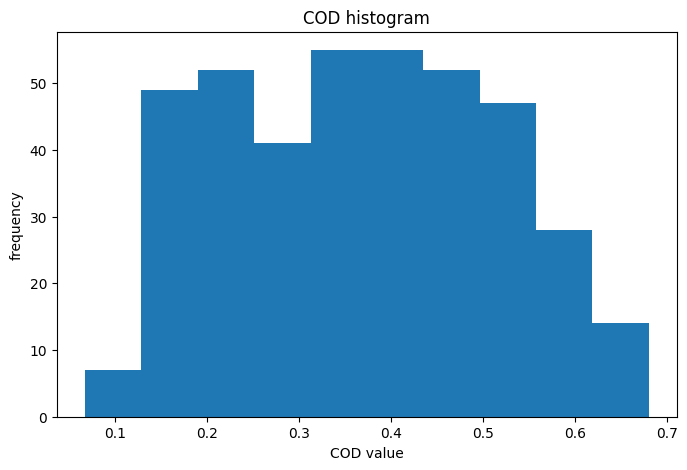

In [15]:
#plot histogram
plt.figure(figsize=(8,5))
plt.hist(CODs)
plt.title('COD histogram')
plt.xlabel("COD value")
plt.ylabel("frequency")
plt.show()

In [16]:
top_best = sorted(movie_COD_other.items(), key=lambda i: i[1][0],reverse=True)
temp_best = top_best[0:10]
temp_best

[('Erik the Viking (1989)', [0.6803586481291373, 'I.Q. (1994)']),
 ('I.Q. (1994)', [0.6803586481291373, 'Erik the Viking (1989)']),
 ('The Lookout (2007)', [0.6589551291567151, 'Patton (1970)']),
 ('Patton (1970)', [0.6589551291567151, 'The Lookout (2007)']),
 ('Congo (1995)', [0.656520890202376, 'The Straight Story (1999)']),
 ('The Straight Story (1999)', [0.656520890202376, 'Congo (1995)']),
 ('The Bandit (1996)', [0.652789366279882, 'Best Laid Plans (1999)']),
 ('Best Laid Plans (1999)', [0.652789366279882, 'The Bandit (1996)']),
 ('Ran (1985)', [0.6478194879446582, 'Heavy Traffic (1973)']),
 ('Heavy Traffic (1973)', [0.6478194879446582, 'Ran (1985)'])]

In [17]:
top_best_list = [[i[0],i[1][0],i[1][1]] for i in temp_best ]
df_best = pd.DataFrame(top_best_list, columns = ['10 movies that are easiest to predict','associated COD value','Which movie’s ratings are the best predictor'])
df_best

,10 movies that are easiest to predict,associated COD value,Which movie’s ratings are the best predictor
0,Erik the Viking (1989),0.680359,I.Q. (1994)
1,I.Q. (1994),0.680359,Erik the Viking (1989)
2,The Lookout (2007),0.658955,Patton (1970)
3,Patton (1970),0.658955,The Lookout (2007)
4,Congo (1995),0.656521,The Straight Story (1999)
5,The Straight Story (1999),0.656521,Congo (1995)
6,The Bandit (1996),0.652789,Best Laid Plans (1999)
7,Best Laid Plans (1999),0.652789,The Bandit (1996)
8,Ran (1985),0.647819,Heavy Traffic (1973)
9,Heavy Traffic (1973),0.647819,Ran (1985)


In [18]:
top_worst = sorted(movie_COD_other.items(),key = lambda i: i[1][0])
temp_worst = top_worst[0:10]
temp_worst

[('Avatar (2009)',
  [0.06788740393778625, "Pirates of the Caribbean: Dead Man's Chest (2006)"]),
 ('Interstellar (2014)', [0.08161205184687792, 'Torque (2004)']),
 ('Black Swan (2010)',
  [0.09486062776297288, 'Once Upon a Time in America (1984)']),
 ('La La Land (2016)', [0.11020663183772739, 'The Lookout (2007)']),
 ('Clueless (1995)', [0.11090474997229227, 'Love Story (1970)']),
 ('The Cabin in the Woods (2012)',
  [0.11547617566324209, 'The Evil Dead (1981)']),
 ('Grown Ups 2 (2013)', [0.12326924270646411, 'Knight and Day (2010)']),
 ('Back to the Future (1985)',
  [0.12983077791309572, '3000 Miles to Graceland (2001)']),
 ('The Wolf of Wall Street (2013)', [0.1327926626628234, 'Memento (2000)']),
 ('Planet of the Apes (2001)', [0.13489887779460075, 'Equilibrium (2002)'])]

In [19]:
top_worst_list = [[i[0],i[1][0],i[1][1]] for i in temp_worst]
df_worst = pd.DataFrame(top_worst_list, columns = ['10 movies that are hardest to predict','associated COD value','Which movie’s ratings are the best predictor'])
df_worst

,10 movies that are hardest to predict,associated COD value,Which movie’s ratings are the best predictor
0,Avatar (2009),0.067887,Pirates of the Caribbean: Dead Man's Chest (2006)
1,Interstellar (2014),0.081612,Torque (2004)
2,Black Swan (2010),0.094861,Once Upon a Time in America (1984)
3,La La Land (2016),0.110207,The Lookout (2007)
4,Clueless (1995),0.110905,Love Story (1970)
5,The Cabin in the Woods (2012),0.115476,The Evil Dead (1981)
6,Grown Ups 2 (2013),0.123269,Knight and Day (2010)
7,Back to the Future (1985),0.129831,3000 Miles to Graceland (2001)
8,The Wolf of Wall Street (2013),0.132793,Memento (2000)
9,Planet of the Apes (2001),0.134899,Equilibrium (2002)


### Question 2

In [20]:
#calculate number of NAs
one = data.columns[474]
nulls = [i for i in data[one].isna() if i==True]
len(nulls)

24

In [21]:
#drop the rows containing NAs in the three given columns
subset = data.columns[474:477]
nadropped_df = data.dropna(subset = subset, inplace=False)

In [22]:
gender_identity_vals = nadropped_df.iloc[:,474].values.reshape(-1,1)
sibship_vals = nadropped_df.iloc[:,475].values.reshape(-1,1)
social_view_vals = nadropped_df.iloc[:,476].values.reshape(-1,1)

In [23]:
#build multiple lr model for movies with best CODs
COD_list_best = []
for bests in temp_best:
    best_predictor = nadropped_df[bests[1][1]].values.reshape(-1,1)
    x = np.concatenate((gender_identity_vals, sibship_vals, social_view_vals,best_predictor), axis=1)
    y = nadropped_df[bests[0]].values.reshape(-1,1)
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)
    r2 = r2_score(y,y_hat)
    COD_list_best.append(r2)
COD_list_best

[0.6705508584276447,
 0.6687209018918612,
 0.6437013269706907,
 0.6428231266182935,
 0.6385559520236557,
 0.6402576126993955,
 0.6430506320418277,
 0.6417301965939766,
 0.6324454638112478,
 0.6331028631650752]

In [24]:
#build multiple lr model for movies with lowest CODs
COD_list_worst = []
for worsts in temp_worst:
    best_predictor = nadropped_df[worsts[1][1]].values.reshape(-1,1)
    x = np.concatenate((gender_identity_vals, sibship_vals, social_view_vals,best_predictor), axis=1)
    y = nadropped_df[worsts[0]].values.reshape(-1,1)
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)
    r2 = r2_score(y,y_hat)
    COD_list_worst.append(r2)
COD_list_worst

[0.07374361632107052,
 0.07563823698608574,
 0.08564157960716079,
 0.10701706758525886,
 0.11131133975134166,
 0.11650779443424464,
 0.12431579982363905,
 0.12733616747013843,
 0.13817100249059588,
 0.13243370404334054]

In [25]:
new_COD_twenty = []
new_COD_twenty.extend(COD_list_best)
new_COD_twenty.extend(COD_list_worst)
new_COD_twenty

[0.6705508584276447,
 0.6687209018918612,
 0.6437013269706907,
 0.6428231266182935,
 0.6385559520236557,
 0.6402576126993955,
 0.6430506320418277,
 0.6417301965939766,
 0.6324454638112478,
 0.6331028631650752,
 0.07374361632107052,
 0.07563823698608574,
 0.08564157960716079,
 0.10701706758525886,
 0.11131133975134166,
 0.11650779443424464,
 0.12431579982363905,
 0.12733616747013843,
 0.13817100249059588,
 0.13243370404334054]

In [26]:
old_COD_twenty = []
old_COD_twenty.extend([i[1][0] for i in temp_best])
old_COD_twenty.extend([i[1][0] for i in temp_worst])
old_COD_twenty

[0.6803586481291373,
 0.6803586481291373,
 0.6589551291567151,
 0.6589551291567151,
 0.656520890202376,
 0.656520890202376,
 0.652789366279882,
 0.652789366279882,
 0.6478194879446582,
 0.6478194879446582,
 0.06788740393778625,
 0.08161205184687792,
 0.09486062776297288,
 0.11020663183772739,
 0.11090474997229227,
 0.11547617566324209,
 0.12326924270646411,
 0.12983077791309572,
 0.1327926626628234,
 0.13489887779460075]

In [27]:
diff = np.array(old_COD_twenty)-np.array(new_COD_twenty)
print(diff)

[ 0.00980779  0.01163775  0.0152538   0.016132    0.01796494  0.01626328
  0.00973873  0.01105917  0.01537402  0.01471662 -0.00585621  0.00597381
  0.00921905  0.00318956 -0.00040659 -0.00103162 -0.00104656  0.00249461
 -0.00537834  0.00246517]


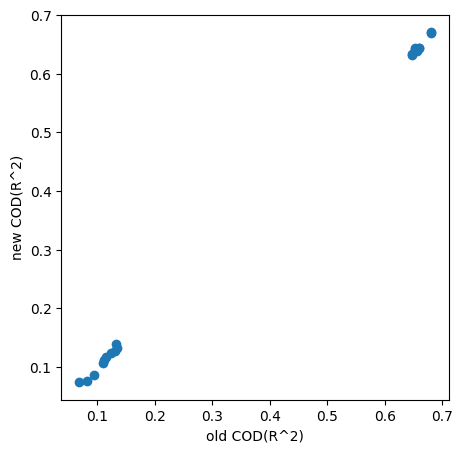

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(old_COD_twenty,new_COD_twenty)
plt.xlabel('old COD(R^2)')
plt.ylabel('new COD(R^2)')
plt.show()

### Question 3

In [29]:
#finding the middle most 30 movies
sorted_movies = sorted(movie_COD_other.items(), key=lambda x: x[1][0])
middle_index = len(sorted_movies) // 2
middle_movies = sorted_movies[max(0, middle_index - 15): middle_index + 15]
middle_movie_names = [movie[0] for movie in middle_movies]
print(middle_movie_names)

['Blues Brothers 2000 (1998)', 'Uptown Girls (2003)', '28 Days Later (2002)', 'The Godfather: Part II (1974)', 'The Godfather (1972)', 'Goodfellas (1990)', 'Knight and Day (2010)', 'The Machinist (2004)', 'Just Married (2003)', 'Equilibrium (2002)', "Pirates of the Caribbean: At World's End (2007)", 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'The Evil Dead (1981)', 'The Poseidon Adventure (1972)', 'Monsters  Inc.(2001)', 'The Rock (1996)', 'Predator (1987)', 'Hellraiser (1987)', "My Best Friend's Wedding (1997)", 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Star Wars: Episode 1 - The Phantom Menace (1999)', 'Star Wars: Episode II - Attack of the Clones (2002)', 'The Good the Bad and the Ugly (1966)', "There's Something About Mary (1998)", 'The Green Mile (1999)', 'Let the Right One In (2008)', 'Showgirls (1995)', 'Black Hawk Down (2001)', 'The Talented Mr. Ripley (1999)']


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import random

random.seed(0)
np.random.seed(0)
# selecting 10 random movies
all_movie_names = data.columns[:400].tolist()
input_movie_names = random.sample([movie for movie in all_movie_names if movie not in middle_movie_names], 10)
X = data[input_movie_names]
Y = data[middle_movie_names]
# 80/20 train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Hyperparameter Tuning
parameters = {'alpha': np.logspace(-4, 4, 20)}
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=5)
rmse_results = {}
best_alphas = {}
beta_coefficients = {}
for movie in middle_movie_names:
    grid_search.fit(X_train, Y_train[movie])
    best_model = grid_search.best_estimator_
    best_alphas[movie] = best_model.alpha
    beta_coefficients[movie] = best_model.coef_
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(Y_test[movie], y_pred, squared=False)
    rmse_results[movie] = rmse
print(input_movie_names)
rmse_results

['The Holiday (2006)', 'Batman: The Dark Knight (2008)', 'The Silence of the Lambs (1991)', 'Ace Ventura: When Nature Calls (1995)', 'Home Alone (1990)', 'L.A. Confidential (1997)', 'The Prestige (2006)', 'Gangs of New York (2002)', 'Traffic (2000)', 'Die Hard (1988)']


{'Blues Brothers 2000 (1998)': 0.3770290512154918,
 'Uptown Girls (2003)': 0.4337682204454962,
 '28 Days Later (2002)': 0.3057769478967105,
 'The Godfather: Part II (1974)': 0.5387899588047661,
 'The Godfather (1972)': 0.6208610501934203,
 'Goodfellas (1990)': 0.3315217412090584,
 'Knight and Day (2010)': 0.3935688305246014,
 'The Machinist (2004)': 0.3882324330826194,
 'Just Married (2003)': 0.3300138964822379,
 'Equilibrium (2002)': 0.4097553853400268,
 "Pirates of the Caribbean: At World's End (2007)": 0.6663332099753871,
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)': 0.6117466907238258,
 'The Evil Dead (1981)': 0.30548909693229553,
 'The Poseidon Adventure (1972)': 0.36889269635728994,
 'Monsters  Inc.(2001)': 0.6087493990993141,
 'The Rock (1996)': 0.3867956651058419,
 'Predator (1987)': 0.29432766742263367,
 'Hellraiser (1987)': 0.4174678854364095,
 "My Best Friend's Wedding (1997)": 0.3601069397661416,
 'Austin Powers: The Spy Who Shagged Me (1999)': 0.5864300

In [31]:
print(best_alphas)
beta_coefficients

{'Blues Brothers 2000 (1998)': 78.47599703514607, 'Uptown Girls (2003)': 29.763514416313132, '28 Days Later (2002)': 78.47599703514607, 'The Godfather: Part II (1974)': 29.763514416313132, 'The Godfather (1972)': 78.47599703514607, 'Goodfellas (1990)': 78.47599703514607, 'Knight and Day (2010)': 78.47599703514607, 'The Machinist (2004)': 29.763514416313132, 'Just Married (2003)': 29.763514416313132, 'Equilibrium (2002)': 206.913808111479, "Pirates of the Caribbean: At World's End (2007)": 29.763514416313132, 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)': 78.47599703514607, 'The Evil Dead (1981)': 78.47599703514607, 'The Poseidon Adventure (1972)': 206.913808111479, 'Monsters  Inc.(2001)': 78.47599703514607, 'The Rock (1996)': 206.913808111479, 'Predator (1987)': 78.47599703514607, 'Hellraiser (1987)': 11.288378916846883, "My Best Friend's Wedding (1997)": 78.47599703514607, 'Austin Powers: The Spy Who Shagged Me (1999)': 78.47599703514607, 'Austin Powers in Goldmember

{'Blues Brothers 2000 (1998)': array([ 0.10421785, -0.00109654,  0.05763488,  0.08847489,  0.02984069,
        -0.0068507 ,  0.10517169,  0.09989415,  0.11897351,  0.06148169]),
 'Uptown Girls (2003)': array([0.11303273, 0.01009508, 0.01470929, 0.09858094, 0.07913261,
        0.12820935, 0.08879813, 0.12577867, 0.19540011, 0.03651784]),
 '28 Days Later (2002)': array([0.08610734, 0.04499372, 0.04619875, 0.06569097, 0.02973814,
        0.13853559, 0.00089156, 0.09445855, 0.08777451, 0.09048686]),
 'The Godfather: Part II (1974)': array([-0.04351937,  0.05944793,  0.15845424,  0.02732277,  0.06106063,
         0.09909288,  0.11719082,  0.0295088 ,  0.1587471 ,  0.0954063 ]),
 'The Godfather (1972)': array([-0.02468894,  0.05740419,  0.11707037,  0.02261946,  0.08282087,
         0.16147627,  0.14168522,  0.07441065,  0.12420171,  0.05305634]),
 'Goodfellas (1990)': array([0.08538897, 0.07665281, 0.07162591, 0.03898504, 0.03020231,
        0.12478127, 0.07429231, 0.09284991, 0.13964946, 0

### Question 4

In [32]:
from sklearn.linear_model import Lasso
random.seed(0)
np.random.seed(0)
# Hyperparameter Tuning
lasso_reg = Lasso()
grid_search_lasso = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)

# LASSO
rmse_results_lasso = {}
best_alphas_lasso = {}
beta_coefficients_lasso = {}
for movie in middle_movie_names:
    grid_search_lasso.fit(X_train, Y_train[movie])
    best_model_lasso = grid_search_lasso.best_estimator_
    best_alphas_lasso[movie] = best_model_lasso.alpha
    beta_coefficients_lasso[movie] = best_model_lasso.coef_
    y_pred_lasso = best_model_lasso.predict(X_test)
    rmse_lasso = mean_squared_error(Y_test[movie], y_pred_lasso, squared=False)
    rmse_results_lasso[movie] = rmse_lasso

rmse_results_lasso

{'Blues Brothers 2000 (1998)': 0.3791900976500419,
 'Uptown Girls (2003)': 0.43496783548954004,
 '28 Days Later (2002)': 0.2995134859429975,
 'The Godfather: Part II (1974)': 0.5392096791447393,
 'The Godfather (1972)': 0.630442535501554,
 'Goodfellas (1990)': 0.3313224168211978,
 'Knight and Day (2010)': 0.3920264720933297,
 'The Machinist (2004)': 0.3905692478689601,
 'Just Married (2003)': 0.33429920254027645,
 'Equilibrium (2002)': 0.40525317447399867,
 "Pirates of the Caribbean: At World's End (2007)": 0.6643707597163744,
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)': 0.6127660916501027,
 'The Evil Dead (1981)': 0.3043058885861733,
 'The Poseidon Adventure (1972)': 0.35831978303370576,
 'Monsters  Inc.(2001)': 0.6091373423880317,
 'The Rock (1996)': 0.3835812204005411,
 'Predator (1987)': 0.2929860101082948,
 'Hellraiser (1987)': 0.41996740808702987,
 "My Best Friend's Wedding (1997)": 0.3585217675896975,
 'Austin Powers: The Spy Who Shagged Me (1999)': 0.588571

In [33]:
print(best_alphas_lasso)
beta_coefficients_lasso

{'Blues Brothers 2000 (1998)': 0.004832930238571752, 'Uptown Girls (2003)': 0.004832930238571752, '28 Days Later (2002)': 0.004832930238571752, 'The Godfather: Part II (1974)': 0.0006951927961775605, 'The Godfather (1972)': 0.0018329807108324356, 'Goodfellas (1990)': 0.0001, 'Knight and Day (2010)': 0.004832930238571752, 'The Machinist (2004)': 0.004832930238571752, 'Just Married (2003)': 0.004832930238571752, 'Equilibrium (2002)': 0.004832930238571752, "Pirates of the Caribbean: At World's End (2007)": 0.004832930238571752, 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)': 0.004832930238571752, 'The Evil Dead (1981)': 0.0006951927961775605, 'The Poseidon Adventure (1972)': 0.004832930238571752, 'Monsters  Inc.(2001)': 0.012742749857031334, 'The Rock (1996)': 0.004832930238571752, 'Predator (1987)': 0.0018329807108324356, 'Hellraiser (1987)': 0.0018329807108324356, "My Best Friend's Wedding (1997)": 0.004832930238571752, 'Austin Powers: The Spy Who Shagged Me (1999)': 0.

{'Blues Brothers 2000 (1998)': array([ 0.10822944, -0.        ,  0.0523368 ,  0.08932749,  0.01862272,
        -0.        ,  0.11654603,  0.10780171,  0.16128885,  0.04723153]),
 'Uptown Girls (2003)': array([0.10989936, 0.00138649, 0.00792715, 0.09756276, 0.07824743,
        0.13054638, 0.08146676, 0.12491898, 0.23425292, 0.02027379]),
 '28 Days Later (2002)': array([ 0.08387676,  0.03598596,  0.03690003,  0.05573743,  0.02093047,
         0.24747633, -0.        ,  0.10065447,  0.06531187,  0.08165973]),
 'The Godfather: Part II (1974)': array([-0.05822413,  0.05566289,  0.16662859,  0.02213592,  0.05994914,
         0.10137501,  0.13238064,  0.00040981,  0.21202483,  0.09795321]),
 'The Godfather (1972)': array([-0.06256489,  0.04337277,  0.12619412,  0.        ,  0.08551706,
         0.3057297 ,  0.17386659,  0.05198992,  0.15902645,  0.01668882]),
 'Goodfellas (1990)': array([0.08542962, 0.07502783, 0.07192867, 0.02298631, 0.02011882,
        0.19579769, 0.06100039, 0.09009982, 0.2

### Question 5

In [35]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
data_original = pd.read_csv("data/movieReplicationSet.csv")
# average movie enjoyment for each user
real_data_df = data_original.iloc[:, :400]  
average_enjoyment = real_data_df.mean(axis=1)  # Average rating for each user
# middle 4 movies
median_ratings = real_data_df.median().sort_values()
middle_movies = median_ratings.iloc[len(median_ratings)//2 - 2 : len(median_ratings)//2 + 2].index.tolist()
valid_indices = ~average_enjoyment.isna() #dropping the user with all nan values
X = average_enjoyment[valid_indices].values.reshape(-1, 1)
# Logistic Regression Models
models = {}
for movie in middle_movies:
    median_rating = data[movie].median()
    Y = (data.loc[valid_indices,movie] >= median_rating).astype(int)
    log_reg = LogisticRegression()
    # cv
    cv_results = cross_validate(log_reg, X, Y, cv=5, scoring='roc_auc', return_estimator=True)
    # AUC
    auc_values = cv_results['test_score']
    mean_auc = np.mean(auc_values)
    models[movie] = {
        'mean_auc': mean_auc,
        'estimators': cv_results['estimator']
    }

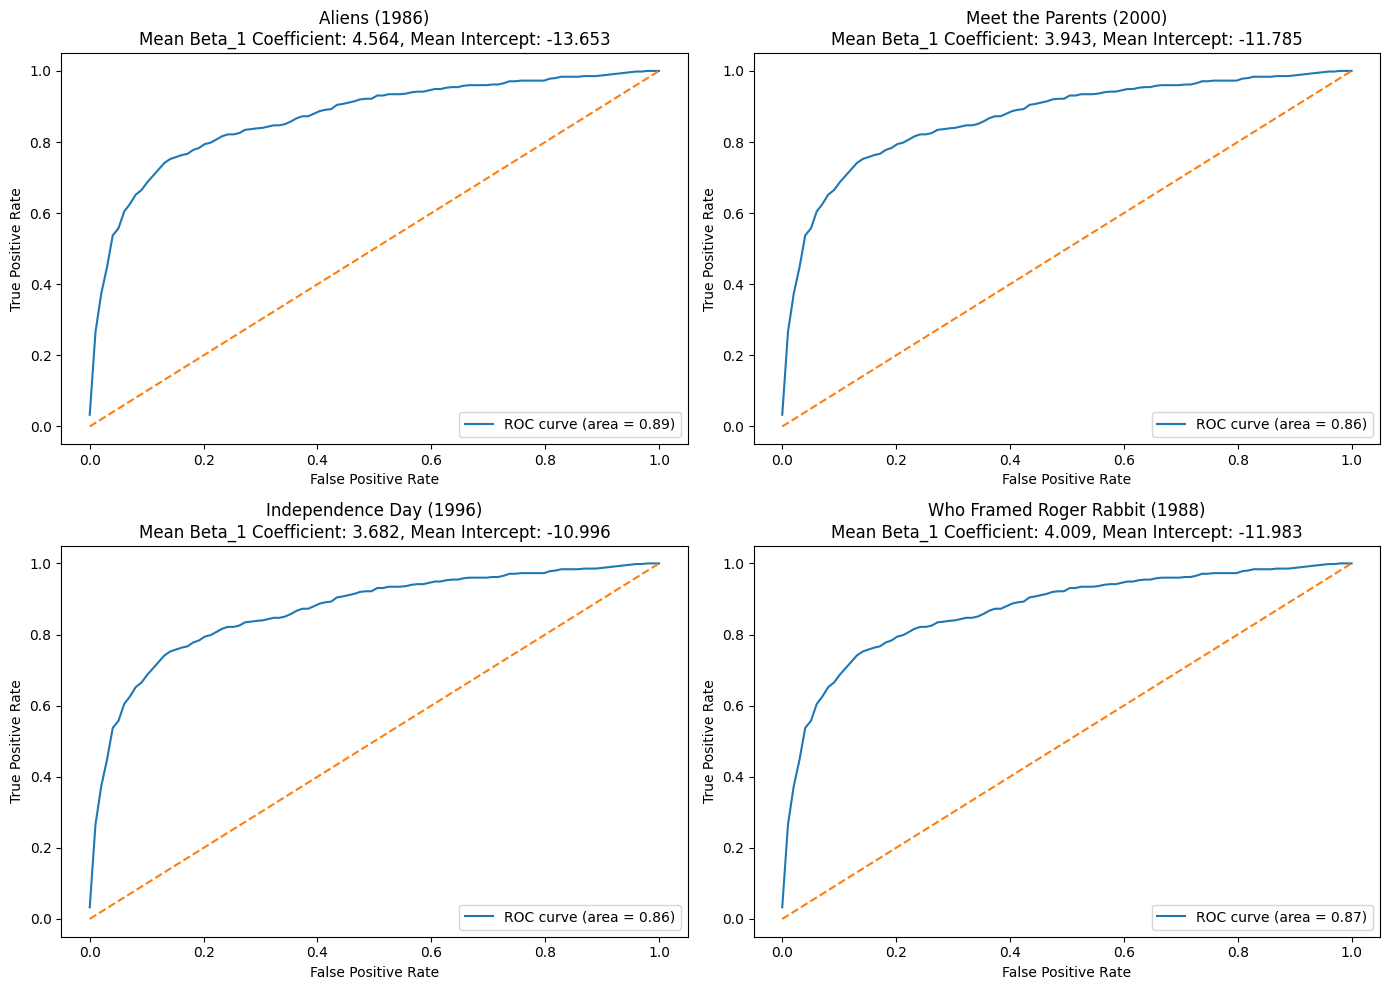

{'Aliens (1986)': {'beta_1': 4.563638917670303,
  'intercept': -13.65318071017865},
 'Meet the Parents (2000)': {'beta_1': 3.9434014010326783,
  'intercept': -11.784674813130398},
 'Independence Day (1996)': {'beta_1': 3.681566022209158,
  'intercept': -10.99600149217981},
 'Who Framed Roger Rabbit (1988)': {'beta_1': 4.00918646940626,
  'intercept': -11.98286544351668}}

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
roc_curves = {}
mean_betas = {}
for i, movie in enumerate(middle_movies):
    # Extracting beta coefficients and intercepts
    beta_coefficients = [est.coef_[0][0] for est in models[movie]['estimators']]
    intercepts = [est.intercept_[0] for est in models[movie]['estimators']]
    mean_beta = np.mean(beta_coefficients)
    mean_intercept = np.mean(intercepts)
    # ROC curve
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    for est in models[movie]['estimators']:
        fpr, tpr, thresholds = roc_curve(Y, est.predict_proba(X)[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
    mean_tpr = np.mean(tprs, axis=0)
    roc_curves[movie] = {'fpr': mean_fpr, 'tpr': mean_tpr}

    axes[i].plot(mean_fpr, mean_tpr, label=f'ROC curve (area = {models[movie]["mean_auc"]:.2f})')
    axes[i].plot([0, 1], [0, 1], linestyle='--')
    axes[i].set_title(f'{movie}\nMean Beta_1 Coefficient: {mean_beta:.3f}, Mean Intercept: {mean_intercept:.3f}')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].legend(loc='lower right')
    mean_betas[movie] = {'beta_1': mean_beta, 'intercept': mean_intercept}
plt.tight_layout()
plt.show()
mean_betas

### Extra Credit

In [37]:
#first, check number of the null values in each column
nulls = [i for i in data['My life is very stressful'].isna() if i==True]
len(nulls)#observed both columns contain very less NAs

3

In [38]:
#drop rows containing NaNs for these two features
extra_c_data = data.dropna(subset=['My life is very stressful', 'Worries a lot'], inplace=False)

In [39]:
x1_vals = extra_c_data['My life is very stressful'].values.reshape(-1,1)
x2_vals = extra_c_data['Worries a lot'].values.reshape(-1,1)

In [40]:
COD_stress = {}
for y_index in tqdm(range(0,num_movie_cols)):#iterate over the 400 movies
    y_vals = extra_c_data.iloc[:,y_index].values #this is the y (ratings for this movie)
    movie_name = extra_c_data.columns[y_index]#this is the movie name
    reg = LinearRegression()
    reg.fit(x1_vals,y_vals)
    y_hat = reg.predict(x1_vals)
    r2 = r2_score(y_vals,y_hat)#COD = r^2
    COD_stress[movie_name] = r2
len(COD_stress)

100%|██████████| 400/400 [00:00<00:00, 2031.25it/s]


400

In [41]:
COD_worries = {}
for y_index in tqdm(range(0,num_movie_cols)):#iterate over the 400 movies
    y_vals = extra_c_data.iloc[:,y_index].values #this is the y (ratings for this movie)
    movie_name = extra_c_data.columns[y_index]#this is the movie name
    reg = LinearRegression()
    reg.fit(x2_vals,y_vals)
    y_hat = reg.predict(x2_vals)
    r2 = r2_score(y_vals,y_hat)#COD = r^2
    COD_worries[movie_name] = r2
len(COD_worries)

100%|██████████| 400/400 [00:00<00:00, 2141.38it/s]


400

In [42]:
COD_stress_list = [COD_stress[i] for i in COD_stress]
COD_worries_list = [COD_worries[i] for i in COD_worries]
print("average COD for stress is", np.mean(COD_stress_list))
print("average COD for worries is",np.mean(COD_worries_list))

average COD for stress is 0.0007103024647777359
average COD for worries is 0.002038182919227817


In [43]:
best_stress = sorted(COD_stress.items(), key=lambda i: i[1],reverse=True)
temp_best_stress = best_stress[0:10]
temp_best_stress

[('Jaws (1975)', 0.0070030172741089025),
 ('Hellraiser (1987)', 0.006779591100630311),
 ('American Pie (1999)', 0.004771931787327044),
 ('10 Things I Hate About You (1999)', 0.004754714511158387),
 ('Stand By Me (1986)', 0.00458751128591528),
 ('Avatar (2009)', 0.0044346717416856585),
 ('Se7en (1995)', 0.004232640993365844),
 ('The Lord of the Rings: The Fellowship of the Ring (2001)',
  0.003892004983122921),
 ('La La Land (2016)', 0.0037673205461459247),
 ('Ice Age (2002)', 0.0036513186027213873)]

In [44]:
best_worries = sorted(COD_worries.items(), key=lambda i: i[1],reverse=True)
temp_best_worries = best_worries[0:10]
temp_best_worries

[('Downfall (2004)', 0.009230615503234008),
 ('Barb Wire (1996)', 0.00910852223919445),
 ('Avatar (2009)', 0.009019711796414254),
 ('The Babadook (2014)', 0.008197888426725197),
 ('25th Hour (2002)', 0.008197830718148613),
 ('Erik the Viking (1989)', 0.007911349121206945),
 ('Stir Crazy (1980)', 0.007688001814572409),
 ('The Truman Show (1998)', 0.007385037115796855),
 ('A.I. Artificial Intelligence (2001)', 0.007147144215032153),
 ('The Proposal (2009)', 0.0071198015957024685)]

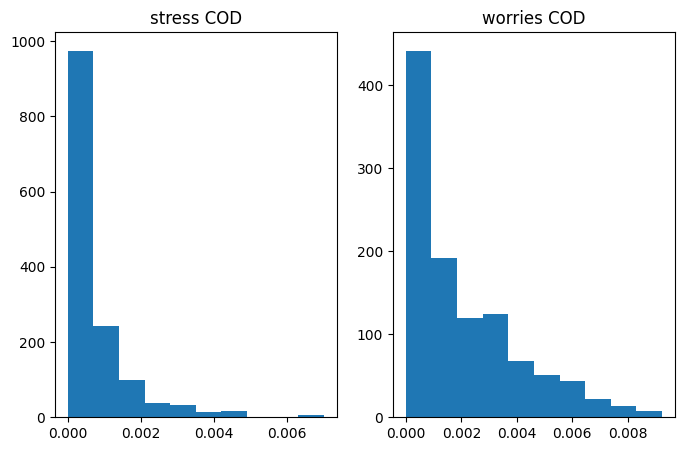

In [45]:
#plot histogram
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(COD_stress_list, density=True)
plt.title('stress COD')
plt.subplot(1,2,2)
plt.hist(COD_worries_list,density=True)
plt.title('worries COD')
plt.show()

In [46]:
strs = np.array([i[1] for i in temp_best_stress])
wrs = np.array([i[1] for i in temp_best_worries])
strs - wrs

array([-0.0022276 , -0.00232893, -0.00424778, -0.00344317, -0.00361032,
       -0.00347668, -0.00345536, -0.00349303, -0.00337982, -0.00346848])